# __Conceptos de estadística e introducción al análisis estadístico de datos usando Python__

In [18]:
#Importa las paqueterías necesarias 
import numpy as np
import matplotlib.pyplot as pit
import pandas as pd 
import seaborn as sns
import pandas_profiling as pp
from joblib import load, dump
import statsmodels.api as sm

Para este ejemplo ocuparemos bases de datos abiertas de crimen, registrados en Estados Unidos, específicamente una submuestra de la base de datos de crimen en Nueva York.

In [19]:
#Usar pandas para leer los datos y guardarlos como data frame
df_NY = load( "./datos_NY_crimen_limpios.pkl")

#Revisar si los datos fueron leidos correctamente
df_NY.head()

,Ciudad,Fecha,Hora,Estatus,Gravedad,Lugar,Crimen_tipo,Lugar_especifico,Edad_sospechoso,Raza_sospechoso,Sexo_sospechoso,Edad_victima,Raza_victima,Sexo_victima,Latitud,Longitud
4241022,MANHATTAN,02/11/2016,00,COMPLETED,FELONY,INSIDE,FELONY ASSAULT,HOSPITAL,18-24,BLACK,F,UNKNOWN,UNKNOWN,E,40.765864,-73.954475
3044,BRONX,09/24/2008,12,COMPLETED,FELONY,NaN,DANGEROUS DRUGS,STREET,NaN,NaN,NaN,NaN,UNKNOWN,E,40.806831,-73.917480
5199195,QUEENS,11/29/2017,20,COMPLETED,MISDEMEANOR,NaN,PETIT LARCENY,STREET,UNKNOWN,UNKNOWN,U,25-44,ASIAN / PACIFIC ISLANDER,M,40.693614,-73.861419
5912690,BROOKLYN,09/09/2012,17,COMPLETED,MISDEMEANOR,REAR OF,DANGEROUS DRUGS,RESIDENCE - PUBLIC HOUSING,NaN,NaN,NaN,NaN,UNKNOWN,E,40.683453,-73.987213
1349935,STATEN ISLAND,08/01/2008,22,COMPLETED,MISDEMEANOR,INSIDE,PETIT LARCENY,RESIDENCE-HOUSE,NaN,NaN,NaN,65+,WHITE,M,40.612835,-74.068611


Diccionario de variables de la base de datos de crimenes en NY.
    1. Ciudad: lugar en el que ocurrio el incidente
    2. Fecha: año, mes y día en el que ocurrio el incidente
    3. Hora: hora en la que ocurrio el incidente
    4. Estatus: indicador de si el incidente fue completado o no 
    5. Gravedad: nivel del incidente; violación, delito mayor, delito menor 
    6. Lugar: lugar de ocurrencia del incidente; dentro, detras de, enfrente a y opuesto a...
    7. Lugar especifico: lugar específico dónde ocurrio el incidente; tienda, casa habitación...
    8. Crimen_tipo: descripción del tipo de delito 
    9. Edad_sospechoso: grupo de edad del sospechoso
    10. Raza_sospechoso: raza del sospechoso 
    11. Sexo_sospechoso: sexo del sospechoso; M hombre, F mujer, U desconocido
    12. Edad_victima: grupo de edad de la victima 
    13. Raza_victima: raza a la que pertenece la víctima
    14. Sexo_victima: sexo de la victima; M hombre, F mujer, U desconocido
        
     
    

## 1.0 __Estadística descriptiva__ 

## 1.1 Conceptos de estadística descriptiva:

**Población**: conjunto de todos los elementos de interés (N). 

**Parámetros**: métricas que obtenemos al trabajar con una población.

**Muestra**:  subgrupo de la población (n). 

**Estadísticos**: métricas que obtenemos al trabajar con poblaciones. 

![Python Packages](https://www.cliffsnotes.com/assets/267169.png)



## 1.2 Una muestra debe ser: 
    
**Representativa**: una muestra representativa es un subgrupo de la poblaciòn que refleja exactamente a los miembros de toda la población.  

**Tomada al azar**: una muestra azarosa es recolectada cuando  cada miembro de la muestra es elegida de la población estrictamente por casualidad


*¿Cómo sabemos que una muestra es representativa?¿Cómo calculamos el tamaño de muestra?*

Depende de los siguientes factores:
    
 1. **Nivel de confianza**: ¿qué necesitamos para estar seguros de que nuestros resultados no ocurrieron solo por azar? Tipicamente se utiliza un nivel de confianza del _95% al 99%_ 
    
 2. **Porcentaje de diferencia que deseemos detectar**: entre más pequeña sea la diferencia que quieres detectar, más grande debe ser la muestra
    
 3. **Valor absoluto de las probabilidades en las que desea detectar diferencias**: depende de la prueba con la que estamos trabajando. Por ejemplo, detectar una diferencia entre 50% y 51% requiere un tamaño de muestra diferente que detectar una diferencia entre 80% y 81%. Es decir que, el tamaño de muestra requerido es una función de N1.
    
 4. **La distribución de los datos (principalmente del resultado)**

## 1.3 ¿Qué es una variable?

**Variable**: es una característica, número o cantidad que puede ser descrita, medida o cuantíficada.

__Tipos de variables__:
    
    1. Cualitativas o catégoricas: ordinales y nominales 
    2. Cuantitativas o numericas: discretas y continuas   

In [3]:
#ORDINALES

In [2]:
#![variable_catégorica_ordinal](https://www.questionpro.com/blog/wp-content/uploads/2018/06/Liker-Scale-Example_4.jpg)

In [ ]:
 #NOMINALES

In [ ]:
#![variable_categorica_nominal](https://i.pinimg.com/originals/30/89/c5/3089c56777a8f68e97c29c4d678644a6.jpg)

In [ ]:
#DISCRETAS

In [ ]:
#![variable_numerica_discreta](https://image.freepik.com/vector-gratis/caracter-hombre-diferentes-edades_61103-88.jpg)

In [4]:
#CONTINUA

In [ ]:
#![variable_numerica_continua](https://concepto.de/wp-content/uploads/2013/05/peso.jpg)

Variables de nuestra base de datos 

In [20]:
df_NY.columns

Index(['Ciudad', 'Fecha', 'Hora', 'Estatus', 'Gravedad', 'Lugar',
       'Crimen_tipo', 'Lugar_especifico', 'Edad_sospechoso', 'Raza_sospechoso',
       'Sexo_sospechoso', 'Edad_victima', 'Raza_victima', 'Sexo_victima',
       'Latitud', 'Longitud'],
      dtype='object')

## 1.4 ¿Cómo representar correctamente los diferentes tipos de variables?

__Datos categóricos:__ gráfica de barras, pastel, diagrama de pareto (tienen ambas barras y porcentajes)
    
__Datos numéricos:__ histograma y scatterplot


## 1.5 Atributos de las variables: medidas de tendencia central 

Medidas de tendencia central: __media, mediana y moda__

1. **Media**: es la más común y la podemos obtener sumando todos los elementos de una variable y dividiéndola por el número de ellos. Es afectada por valores extremos
    
2. **Mediana**: número de la posición central de las observaciones (en orden ascendente). No es afectada por valores extremos. 
    
3. **Moda**: el dato más común (puede existir más de una moda).


![tendencia_central](http://andromeda.estadistica.unam.mx/tutorial_estadistica/Est_Indic_SHCP/recursos/imgpp07u1t04.png)

## 1.6 Atributos de las variables: medidas de asimetría (sesgo) o dispersión 

__Sesgo__: indica si los datos se concentran en un lado de la curva
    Por ejemplo: 
        
        1) cuando la medias es > que la mediana los datos se concentran del lado izquierdo de la curva, es decir que los outlier se encuentra del lado derecho de la distribución. 
        2) cuando la mediana < que la media, la mayor parte de los datos se concentran del lado derecho de la distribución y los outliers se encuentran en el lado izquierdo de la distribución. 

        En ambos casos la moda es la medida con mayor representación.

__Sin sesgo__: cuando la mediana, la moda y la media son iguales, la distribución es simétrica. 

   
__El sesgo nos habla de donde se encuentran nuestros datos!__


## 1.7 Varianza 

La __varianza__ es una medida de dispersión de un grupo de datos alrededor de la media.

Una forma más fácil de “visualizar” la varianza es por medio de la __desviación estandar__, en la mayoría de los casos esta es más significativa. 
El __coeficiente de variación__ es igual a la desviación estándar dividida por el promedio

La desviación estandar es la medida más común de variabilidad para una base de datos única. Una de las principales ventajas de usar desviación estandar es que las unidades no estan elevadas al cuadrado y son más facil de interpretar   


## 1.8  Relación entre variables 

__Covarianza y Coeficiente de correlación lineal__

La covarianza puede ser >0, =0 o <0:

1. >0 las dos variables se mueven juntas
2. <0 las dos variables se mueven en direcciones opuestas
3. =0 las dos variables son independientes 

El coeficiente de correlación va de -1 a 1 


__Para explorar los atributos de cada una de las variables dentro de nuestra base de datos podemos hacer un profile report (podemos resolver toda la estadística descrptiva con un solo comando!!). Este reporte es el resultado de un análisis de cada una de las variables que integran la base de datos. Por medio de este, podemos verificar a que tipo de dato pertenece cada variable y obtener las medidas de tendencia central y asímetria. Con el fin de tener una idea general del comportamiento de nuestras variables. 
Además, el profile report arroja un análisis de correlación entre variables (ver más adelante), que nos indica que tan relacionadas están entre si dos pares de variables__. 

In [21]:
#pp.ProfileReport(df_NY[['Ciudad', 'Fecha', 'Hora', 'Estatus', 'Gravedad', 'Lugar','Crimen_tipo', 'Lugar_especifico', 'Edad_sospechoso', 'Raza_sospechoso','Sexo_sospechoso', 'Edad_victima', 'Raza_victima', 'Sexo_victima']])

## __2.0  Estadística inferencial__ 

## 2.1 Distribuciónes de probabilidad  

Una __distribución__ es una función que muestra los valores posibles de una variable y que tan frecuentemente ocurren. 
Es decir la __frecuencia__ en la que los posibles valores de una variable ocurren en un intervalo.

Las distribución más famosa en estadística(no precisamente la más común)es la __distribución normal__, donde la media moda y mediana son =. Es decir no hay sesgo

Frecuentemente, cuando los valores de una variable no tienen una distribución normal se recurre a transformaciones o estandarizaciones. 


## 2.2 Regresión lineal 

Una __regresión lineal__ es un modelo matemático para aproximar la relación de dependencia entre dos variables, una variable independiente y otra dependiente.

*Los valores de las variables dependientes dependen de los valores de las variables independientes*


## 2.3 Análisis de varianza

__Analisis de Varianza (ANOVA)__ se utiliza para comparar los promedios de dos o más grupos. Una prueba de ANOVA puede indicarte si hay diferencia en el promedio entre los grupos. Sin embargo,no nos da información sobre dónde se encuentra la diferencia (entre cuál y cuál grupo). Para resolver esto, podemos realizar una prueba post-hoc.   

## __Análisis de base de datos abierta de delitos en NY__  

### 1.0 Evaluar frecuencia de delitos 

Podemos empezar por análizar los tipos de crimenes registrados, así como frecuencia de cada tipo de crimen.

In [22]:
#Usar value_counts en Pandas para cuantificar y organizar el tipo de crimenes

df_NY.Crimen_tipo.value_counts().iloc[:10]

PETIT LARCENY                     16527
HARRASSMENT 2                     12434
ASSAULT 3 & RELATED OFFENSES      10518
CRIMINAL MISCHIEF & RELATED OF    10242
GRAND LARCENY                      8715
DANGEROUS DRUGS                    6120
OFF. AGNST PUB ORD SENSBLTY &      5161
FELONY ASSAULT                     3742
ROBBERY                            3683
BURGLARY                           3548
Name: Crimen_tipo, dtype: int64

In [23]:
df_NY.Crimen_tipo.value_counts().iloc[:10]

PETIT LARCENY                     16527
HARRASSMENT 2                     12434
ASSAULT 3 & RELATED OFFENSES      10518
CRIMINAL MISCHIEF & RELATED OF    10242
GRAND LARCENY                      8715
DANGEROUS DRUGS                    6120
OFF. AGNST PUB ORD SENSBLTY &      5161
FELONY ASSAULT                     3742
ROBBERY                            3683
BURGLARY                           3548
Name: Crimen_tipo, dtype: int64

Ahora vamos a crear una grafica de los resultados para tener una mejor visualización de los datos.

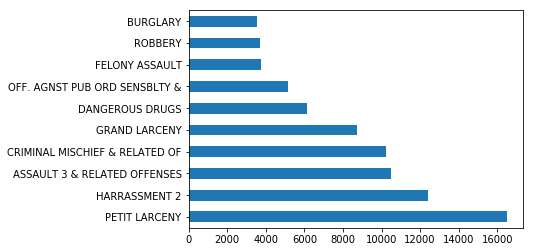

In [24]:
df_NY.Crimen_tipo.value_counts().iloc[:10].plot(kind= "barh")

Podemos observar que los crimenes con mayor ocurrencia son  "Petit larceny" y "Harraament 2"

### 1.1 Evaluar frecuencia de un delito específico: por ejemplo "Harrassment"

In [25]:
df_NY.dropna(inplace=True)

In [26]:
acoso = df_NY[df_NY["Crimen_tipo"].str.contains("HARRASSMENT 2")]
acoso.head(5)

,Ciudad,Fecha,Hora,Estatus,Gravedad,Lugar,Crimen_tipo,Lugar_especifico,Edad_sospechoso,Raza_sospechoso,Sexo_sospechoso,Edad_victima,Raza_victima,Sexo_victima,Latitud,Longitud
4094674,BROOKLYN,04/07/2016,07,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,PUBLIC SCHOOL,UNKNOWN,BLACK,M,25-44,ASIAN / PACIFIC ISLANDER,M,40.668631,-73.904630
4899166,BRONX,08/23/2016,08,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,STORAGE FACILITY,25-44,WHITE HISPANIC,M,25-44,WHITE,M,40.806521,-73.910187
3410287,QUEENS,06/19/2018,12,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE-HOUSE,25-44,UNKNOWN,M,UNKNOWN,WHITE HISPANIC,F,40.725925,-73.809629
3401750,MANHATTAN,07/21/2018,16,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,45-64,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F,40.862255,-73.926297
3954391,BRONX,07/30/2017,08,COMPLETED,VIOLATION,FRONT OF,HARRASSMENT 2,RESIDENCE - APT. HOUSE,UNKNOWN,WHITE HISPANIC,M,25-44,WHITE,M,40.903782,-73.906391


## 2.0 Relaciones entre dos variables dependiente e independiente (de manera visual).

 ### 2.1 Análisis de la ocurrencia del __delito__ por __sitio__ 

¿Existen diferencias en la frecuencia de acoso en las diferentes localidades en NY? Es decir, qué lugares son más peligrosos. 
En este ejemplo, la variable dependiente sería la ocurrecia del delito y la indenpendiente el sitio. 

Para ello, usaremos la función __"groupby"__ de Pandas para agrupar por el tipo de localidades, y la función __size__ para revisar el número registrado en cada localidad. 

In [27]:
acoso.columns

Index(['Ciudad', 'Fecha', 'Hora', 'Estatus', 'Gravedad', 'Lugar',
       'Crimen_tipo', 'Lugar_especifico', 'Edad_sospechoso', 'Raza_sospechoso',
       'Sexo_sospechoso', 'Edad_victima', 'Raza_victima', 'Sexo_victima',
       'Latitud', 'Longitud'],
      dtype='object')

In [28]:
acoso.head()

,Ciudad,Fecha,Hora,Estatus,Gravedad,Lugar,Crimen_tipo,Lugar_especifico,Edad_sospechoso,Raza_sospechoso,Sexo_sospechoso,Edad_victima,Raza_victima,Sexo_victima,Latitud,Longitud
4094674,BROOKLYN,04/07/2016,07,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,PUBLIC SCHOOL,UNKNOWN,BLACK,M,25-44,ASIAN / PACIFIC ISLANDER,M,40.668631,-73.904630
4899166,BRONX,08/23/2016,08,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,STORAGE FACILITY,25-44,WHITE HISPANIC,M,25-44,WHITE,M,40.806521,-73.910187
3410287,QUEENS,06/19/2018,12,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE-HOUSE,25-44,UNKNOWN,M,UNKNOWN,WHITE HISPANIC,F,40.725925,-73.809629
3401750,MANHATTAN,07/21/2018,16,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,45-64,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F,40.862255,-73.926297
3954391,BRONX,07/30/2017,08,COMPLETED,VIOLATION,FRONT OF,HARRASSMENT 2,RESIDENCE - APT. HOUSE,UNKNOWN,WHITE HISPANIC,M,25-44,WHITE,M,40.903782,-73.906391


In [29]:
acoso.groupby("Ciudad").size().sort_values(ascending=False)

Ciudad
BROOKLYN         1889
BRONX            1336
QUEENS           1306
MANHATTAN        1115
STATEN ISLAND     403
dtype: int64

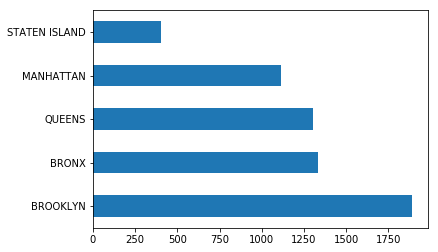

In [30]:
acoso.Ciudad.value_counts().iloc[:10].plot(kind= "barh")

Al observar los resultados podemos distinguir en cuál de las localidades de NY hay mayores reportes de acoso. Brooklyn presenta más reportes de acoso. 

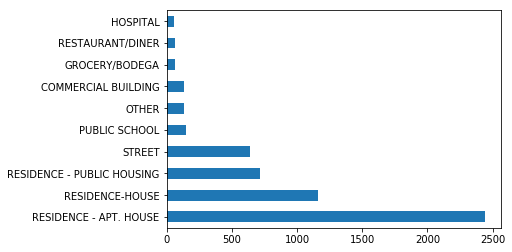

In [31]:
acoso.Lugar_especifico.value_counts().iloc[:10].plot(kind= "barh")

El acoso ocurrió con mayor frecuencia dentro de casas y lugares de residencia.  

 ### 2.2. Análisis de la ocurrencia del delito en el tiempo

Si queremos saber la frecuencia de ocurrencia del delito en diferentes años (2004-2018) y meses del año.
Aquí la variable dependiente es nuevamente la ocurrencia del delito y la independiente el tiempo. 

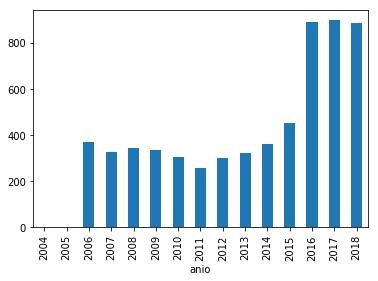

In [33]:
acoso.groupby("anio").size().plot(kind="bar")


Podemos observar la mayoria de los resportes de acoso ocurrieron del 2016 al 2018. El 2011 fue el año con menor número de reportes de la ocurrencia de acoso 

### 2.3. Analisis de ocurrencia del delito por sexo de la víctima y del agresor 

En este ejemplo, la variable dependiente es el sexo de la víctima y la independiente el sexo del agresor 

#### VICTIMAS

In [34]:
acoso.groupby("Sexo_victima").size().sort_values(ascending=False)

Sexo_victima
F    4243
M    1778
D      25
E       3
dtype: int64

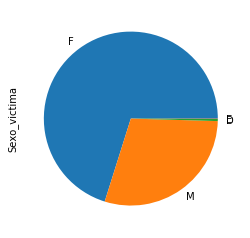

In [35]:
acoso.Sexo_victima.value_counts().iloc[:10].plot(kind= "pie")

In [36]:
acoso.groupby("Edad_victima").size().sort_values(ascending=False)

Edad_victima
25-44      2942
45-64      1591
18-24       797
<18         305
65+         273
UNKNOWN     141
dtype: int64

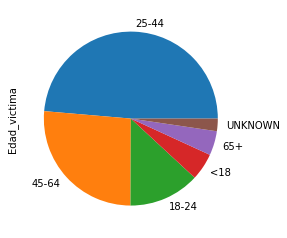

In [37]:
acoso.Edad_victima.value_counts().iloc[:10].plot(kind= "pie")

#### SOSPECHOSOS

In [38]:
acoso.groupby("Sexo_sospechoso").size().sort_values(ascending=False)

Sexo_sospechoso
M    3987
F    1757
U     305
dtype: int64

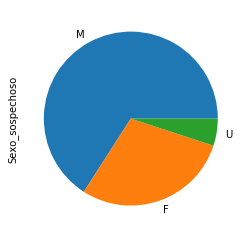

In [39]:
acoso.Sexo_sospechoso.value_counts().iloc[:10].plot(kind= "pie")

In [40]:
acoso.groupby("Edad_sospechoso").size().sort_values(ascending=False)

Edad_sospechoso
25-44      2677
45-64      1187
UNKNOWN     924
18-24       798
<18         301
65+         162
dtype: int64

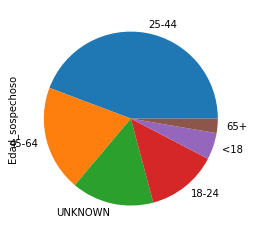

In [41]:
acoso.Edad_sospechoso.value_counts().iloc[:10].plot(kind= "pie")

### 2.4. Analisis de ocurrencia del delito por raza de la víctima y del agresor 

En este ultimo ejemplo de relación entre variables, la variable dependiente es la raza de la víctima y la independiente es la raza del agresor. 

#### VICTIMAS

In [42]:
acoso.groupby("Raza_victima").size().sort_values(ascending=False)

Raza_victima
BLACK                             2368
WHITE HISPANIC                    1491
WHITE                             1183
ASIAN / PACIFIC ISLANDER           364
UNKNOWN                            304
BLACK HISPANIC                     293
AMERICAN INDIAN/ALASKAN NATIVE      46
dtype: int64

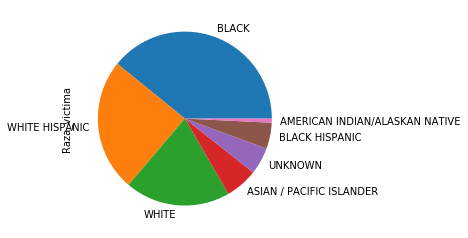

In [43]:
acoso.Raza_victima.value_counts().iloc[:10].plot(kind= "pie")

#### SOSPECHOSOS

In [44]:
acoso.groupby("Raza_sospechoso").size().sort_values(ascending=False)

Raza_sospechoso
BLACK                             2479
WHITE HISPANIC                    1269
WHITE                              938
UNKNOWN                            697
BLACK HISPANIC                     337
ASIAN / PACIFIC ISLANDER           295
AMERICAN INDIAN/ALASKAN NATIVE      34
dtype: int64

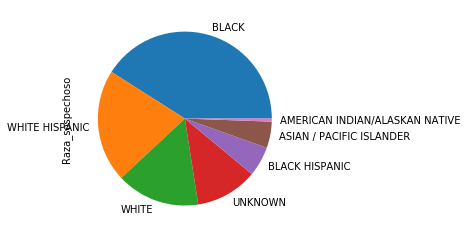

In [45]:
acoso.Raza_sospechoso.value_counts().iloc[:10].plot(kind= "pie")

## 3.0 Regresión lineal 

Pongamos a prueba la relación entre un par de variables. Por ejemplo, pero de la victima y peso del agresor. La relación puede ser negativa o positiva.  

In [54]:
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model

In [62]:
df_w = pd.read_csv('Weight.csv')
df_w.head()

,VIC_Weight,AGRE_Weight
0,241.893563,109.720985
1,162.310473,73.622732
2,212.740856,96.497550
3,220.042470,99.809504
4,206.349801,93.598619


In [63]:
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

NameError: name 'y' is not defined

In [184]:
from scipy.stats import shapiro
stat, p = shapiro (y)
print('statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('its Gaussian')
else:
    print('not Gaussian')

statistics=0.986, p=0.000
not Gaussian


/Users/nadia/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


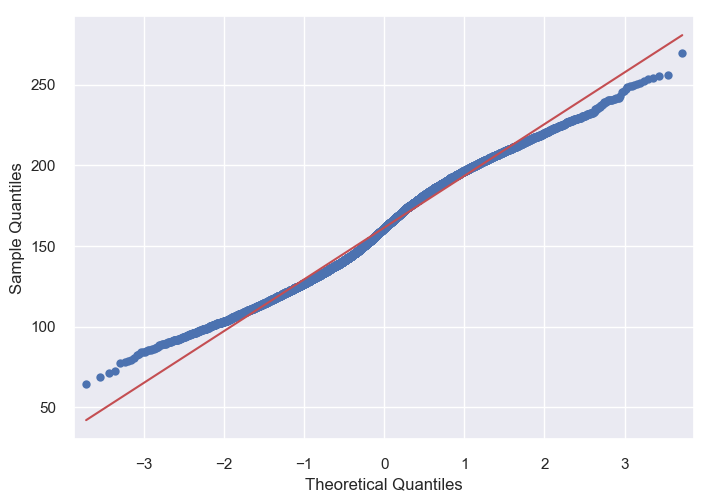

In [189]:
import statsmodels.api as sm
import pylab
sm.qqplot(y, loc = 4, scale = 3, line = 's')
pylab.show()

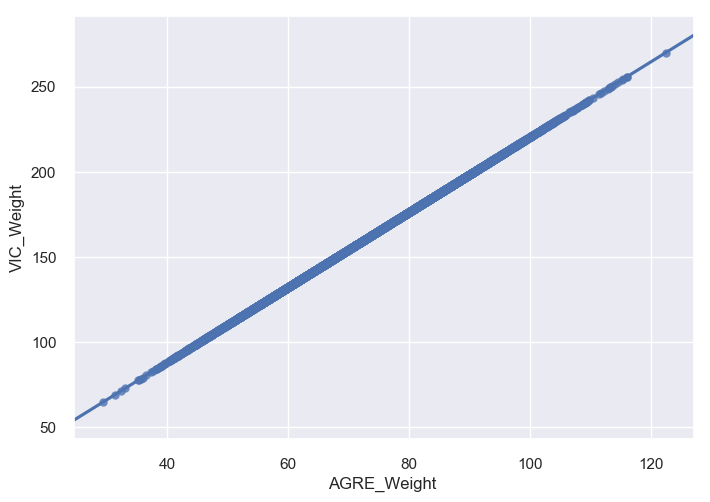

In [191]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

sns.regplot(x = "AGRE_Weight ", y = "VIC_Weight", data = tamano);

## 4.0 ANOVA 

Para realizar un análisis de variaza utilizando nuestros datos inicialmente debemos plantearnos una hipótesis. Por ejemplo: Existe diferencias en la edad de las víctimas entre los sitios donde ocurre ocoso.
Podemos probar nuetra hipótesis de manera estadística. 

En este caso generaremos una columna extra de datos numericos continuos aproximados de "Edad_calculada_victima" y "Edad_calculada_agresor" para hacer el análisis

In [48]:
import pandas as pd
import scipy.stats as stats

import statsmodels. api as sm
from statsmodels.formula.api import ols


In [49]:
acoso["Edad_sospechoso"].unique()


array(['UNKNOWN', '25-44', '45-64', '18-24', '<18', '65+'], dtype=object)

In [50]:
from random import randint

def rango_a_random(s):
    if type(s)==str:
        s = s.split('-')
        s = [int(i) for i in s]
        s = randint(s[0],s[1]+1)
    return s

acoso["Edad_calculada_victima"] = acoso["Edad_victima"]
acoso["Edad_calculada_victima"] = acoso["Edad_calculada_victima"].replace("65+","65-90").replace("<18","15-18").replace("UNKNOWN",np.nan)
acoso["Edad_calculada_victima"] = acoso["Edad_calculada_victima"].apply(rango_a_random)

acoso["Edad_calculada_sospechoso"] = acoso["Edad_sospechoso"]
acoso["Edad_calculada_sospechoso"] = acoso["Edad_calculada_sospechoso"].replace("65+","65-90").replace("<18","15-18").replace("UNKNOWN",np.nan)
acoso["Edad_calculada_sospechoso"] = acoso["Edad_calculada_sospechoso"].apply(rango_a_random)

/Users/nadia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/nadia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/nadia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [51]:
acoso.head(5)

,Ciudad,Fecha,Hora,Estatus,Gravedad,Lugar,Crimen_tipo,Lugar_especifico,Edad_sospechoso,Raza_sospechoso,Sexo_sospechoso,Edad_victima,Raza_victima,Sexo_victima,Latitud,Longitud,anio,Edad_calculada_victima,Edad_calculada_sospechoso
4094674,BROOKLYN,04/07/2016,07,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,PUBLIC SCHOOL,UNKNOWN,BLACK,M,25-44,ASIAN / PACIFIC ISLANDER,M,40.668631,-73.904630,2016,36.0,NaN
4899166,BRONX,08/23/2016,08,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,STORAGE FACILITY,25-44,WHITE HISPANIC,M,25-44,WHITE,M,40.806521,-73.910187,2016,27.0,44.0
3410287,QUEENS,06/19/2018,12,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE-HOUSE,25-44,UNKNOWN,M,UNKNOWN,WHITE HISPANIC,F,40.725925,-73.809629,2018,NaN,28.0
3401750,MANHATTAN,07/21/2018,16,COMPLETED,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,45-64,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F,40.862255,-73.926297,2018,28.0,47.0
3954391,BRONX,07/30/2017,08,COMPLETED,VIOLATION,FRONT OF,HARRASSMENT 2,RESIDENCE - APT. HOUSE,UNKNOWN,WHITE HISPANIC,M,25-44,WHITE,M,40.903782,-73.906391,2017,25.0,NaN


In [222]:
acoso.dropna ()
results = ols('Edad_calculada_victima ~ C(Ciudad)', data = acoso).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Edad_calculada_victima   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                  0.002
Method:                     Least Squares   F-statistic:                     4.129
Date:                    Fri, 29 Nov 2019   Prob (F-statistic):            0.00242
Time:                            10:15:16   Log-Likelihood:                -24645.
No. Observations:                    5908   AIC:                         4.930e+04
Df Residuals:                        5903   BIC:                         4.933e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     38.2012      0.434     88.031      0.000      37.351      39.052
C(Ciudad)[T.BROOKLYN]          1.3633      0.567      2.406      0.016       0.252       2.474
C(Ciudad)[T.MANHATTAN]         2.0374      0.646      3.152      0.002       0.770       3.304
C(Ciudad)[T.QUEENS]            2.2375      0.617      3.628      0.000       1.028       3.447
C(Ciudad)[T.STATEN ISLAND]     0.6947      0.902      0.770      0.441      -1.073       2.462
==============================================================================
Omnibus:                      395.890   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.450
Skew:                           0.692   Prob(JB):                    1.28e-104
Kurtosis:                       3.163   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En un análisis de varianza los dos "datos" de mayor importancia son el valor de F (F-statistic) y el valor de P (Prof F-statistic). Debemos obtener un avalor de P <0.05 para poder aceptar nuestra hipótesis. 
En el ejemplo nuestro valor de F=4.129 y el de P=0.002. Es decir que podemos aceptar nuestra hipótesis. 